Vy Duong - ALY6010 - Module 5 - Air Quality

Practice project on Air Quality dataset https://www.kaggle.com/datasets/fedesoriano/air-quality-data-set

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import math
from datetime import datetime

In [3]:
# import data and rename columns
df = pd.read_excel('AirQualityUCI.xlsx',parse_dates = ['Date'], names =['Date','Time','CO2','CO2 sensor response',
'NMHC','Benzene','NMHC sensor response','NOx','NOx sensor response','NO2','NO2 sensor response',
'O3 sensor response','Temperature','Humidity %','Absolute Humidity'])

In [4]:
df.head()

Date      Time  CO2  CO2 sensor response  NMHC    Benzene   
0 2004-03-10  18:00:00  2.6              1360.00   150  11.881723  \
1 2004-03-10  19:00:00  2.0              1292.25   112   9.397165   
2 2004-03-10  20:00:00  2.2              1402.00    88   8.997817   
3 2004-03-10  21:00:00  2.2              1375.50    80   9.228796   
4 2004-03-10  22:00:00  1.6              1272.25    51   6.518224   

   NMHC sensor response    NOx  NOx sensor response    NO2   
0               1045.50  166.0              1056.25  113.0  \
1                954.75  103.0              1173.75   92.0   
2                939.25  131.0              1140.00  114.0   
3                948.25  172.0              1092.00  122.0   
4                835.50  131.0              1205.00  116.0   

   NO2 sensor response  O3 sensor response  Temperature  Humidity %   
0              1692.00             1267.50        13.60   48.875001  \
1              1558.75              972.25        13.30   47.700000   
2              1554.50             1074.00        11.90   53.975000   
3              1583.75             1203.25        11.00   60.000000   
4              1490.00             1110.00        11.15   59.575001   

   Absolute Humidity  
0           0.757754  
1           0.725487  
2           0.750239  
3           0.786713  
4           0.788794

In [5]:
df.describe().T

count                           mean   
Date                    9357  2004-09-21 04:30:05.193972480  \
CO2                   9357.0                     -34.207524   
CO2 sensor response   9357.0                    1048.869652   
NMHC                  9357.0                    -159.090093   
Benzene               9357.0                       1.865576   
NMHC sensor response  9357.0                     894.475963   
NOx                   9357.0                       168.6042   
NOx sensor response   9357.0                     794.872333   
NO2                   9357.0                      58.135898   
NO2 sensor response   9357.0                    1391.363266   
O3 sensor response    9357.0                     974.951534   
Temperature           9357.0                         9.7766   
Humidity %            9357.0                      39.483611   
Absolute Humidity     9357.0                      -6.837604   

                                      min                  25%   
Date                  2004-03-10 00:00:00  2004-06-16 00:00:00  \
CO2                                -200.0                  0.6   
CO2 sensor response                -200.0                921.0   
NMHC                               -200.0               -200.0   
Benzene                            -200.0             4.004958   
NMHC sensor response               -200.0                711.0   
NOx                                -200.0                 50.0   
NOx sensor response                -200.0                637.0   
NO2                                -200.0                 53.0   
NO2 sensor response                -200.0              1184.75   
O3 sensor response                 -200.0               699.75   
Temperature                        -200.0                10.95   
Humidity %                         -200.0                34.05   
Absolute Humidity                  -200.0             0.692275   

                                      50%                  75%   
Date                  2004-09-21 00:00:00  2004-12-28 00:00:00  \
CO2                                   1.5                  2.6   
CO2 sensor response                1052.5              1221.25   
NMHC                               -200.0               -200.0   
Benzene                          7.886653            13.636091   
NMHC sensor response                894.5              1104.75   
NOx                                 141.0                284.2   
NOx sensor response                794.25               960.25   
NO2                                  96.0                133.0   
NO2 sensor response                1445.5               1662.0   
O3 sensor response                  942.0              1255.25   
Temperature                          17.2               24.075   
Humidity %                          48.55               61.875   
Absolute Humidity                0.976823             1.296223   

                                      max         std  
Date                  2005-04-04 00:00:00         NaN  
CO2                                  11.9    77.65717  
CO2 sensor response               2039.75  329.817015  
NMHC                               1189.0  139.789093  
Benzene                         63.741476   41.380154  
NMHC sensor response               2214.0  342.315902  
NOx                                1479.0  257.424561  
NOx sensor response               2682.75  321.977031  
NO2                                 339.7  126.931428  
NO2 sensor response                2775.0  467.192382  
O3 sensor response                2522.75  456.922728  
Temperature                          44.6   43.203438  
Humidity %                         88.725   51.215645  
Absolute Humidity                2.231036    38.97667

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  9357 non-null   datetime64[ns]
 1   Time                  9357 non-null   object        
 2   CO2                   9357 non-null   float64       
 3   CO2 sensor response   9357 non-null   float64       
 4   NMHC                  9357 non-null   int64         
 5   Benzene               9357 non-null   float64       
 6   NMHC sensor response  9357 non-null   float64       
 7   NOx                   9357 non-null   float64       
 8   NOx sensor response   9357 non-null   float64       
 9   NO2                   9357 non-null   float64       
 10  NO2 sensor response   9357 non-null   float64       
 11  O3 sensor response    9357 non-null   float64       
 12  Temperature           9357 non-null   float64       
 13  Humidity %        

In [7]:
df.isnull().sum()
# there seems to be no NULL records

Date                    0
Time                    0
CO2                     0
CO2 sensor response     0
NMHC                    0
Benzene                 0
NMHC sensor response    0
NOx                     0
NOx sensor response     0
NO2                     0
NO2 sensor response     0
O3 sensor response      0
Temperature             0
Humidity %              0
Absolute Humidity       0
dtype: int64

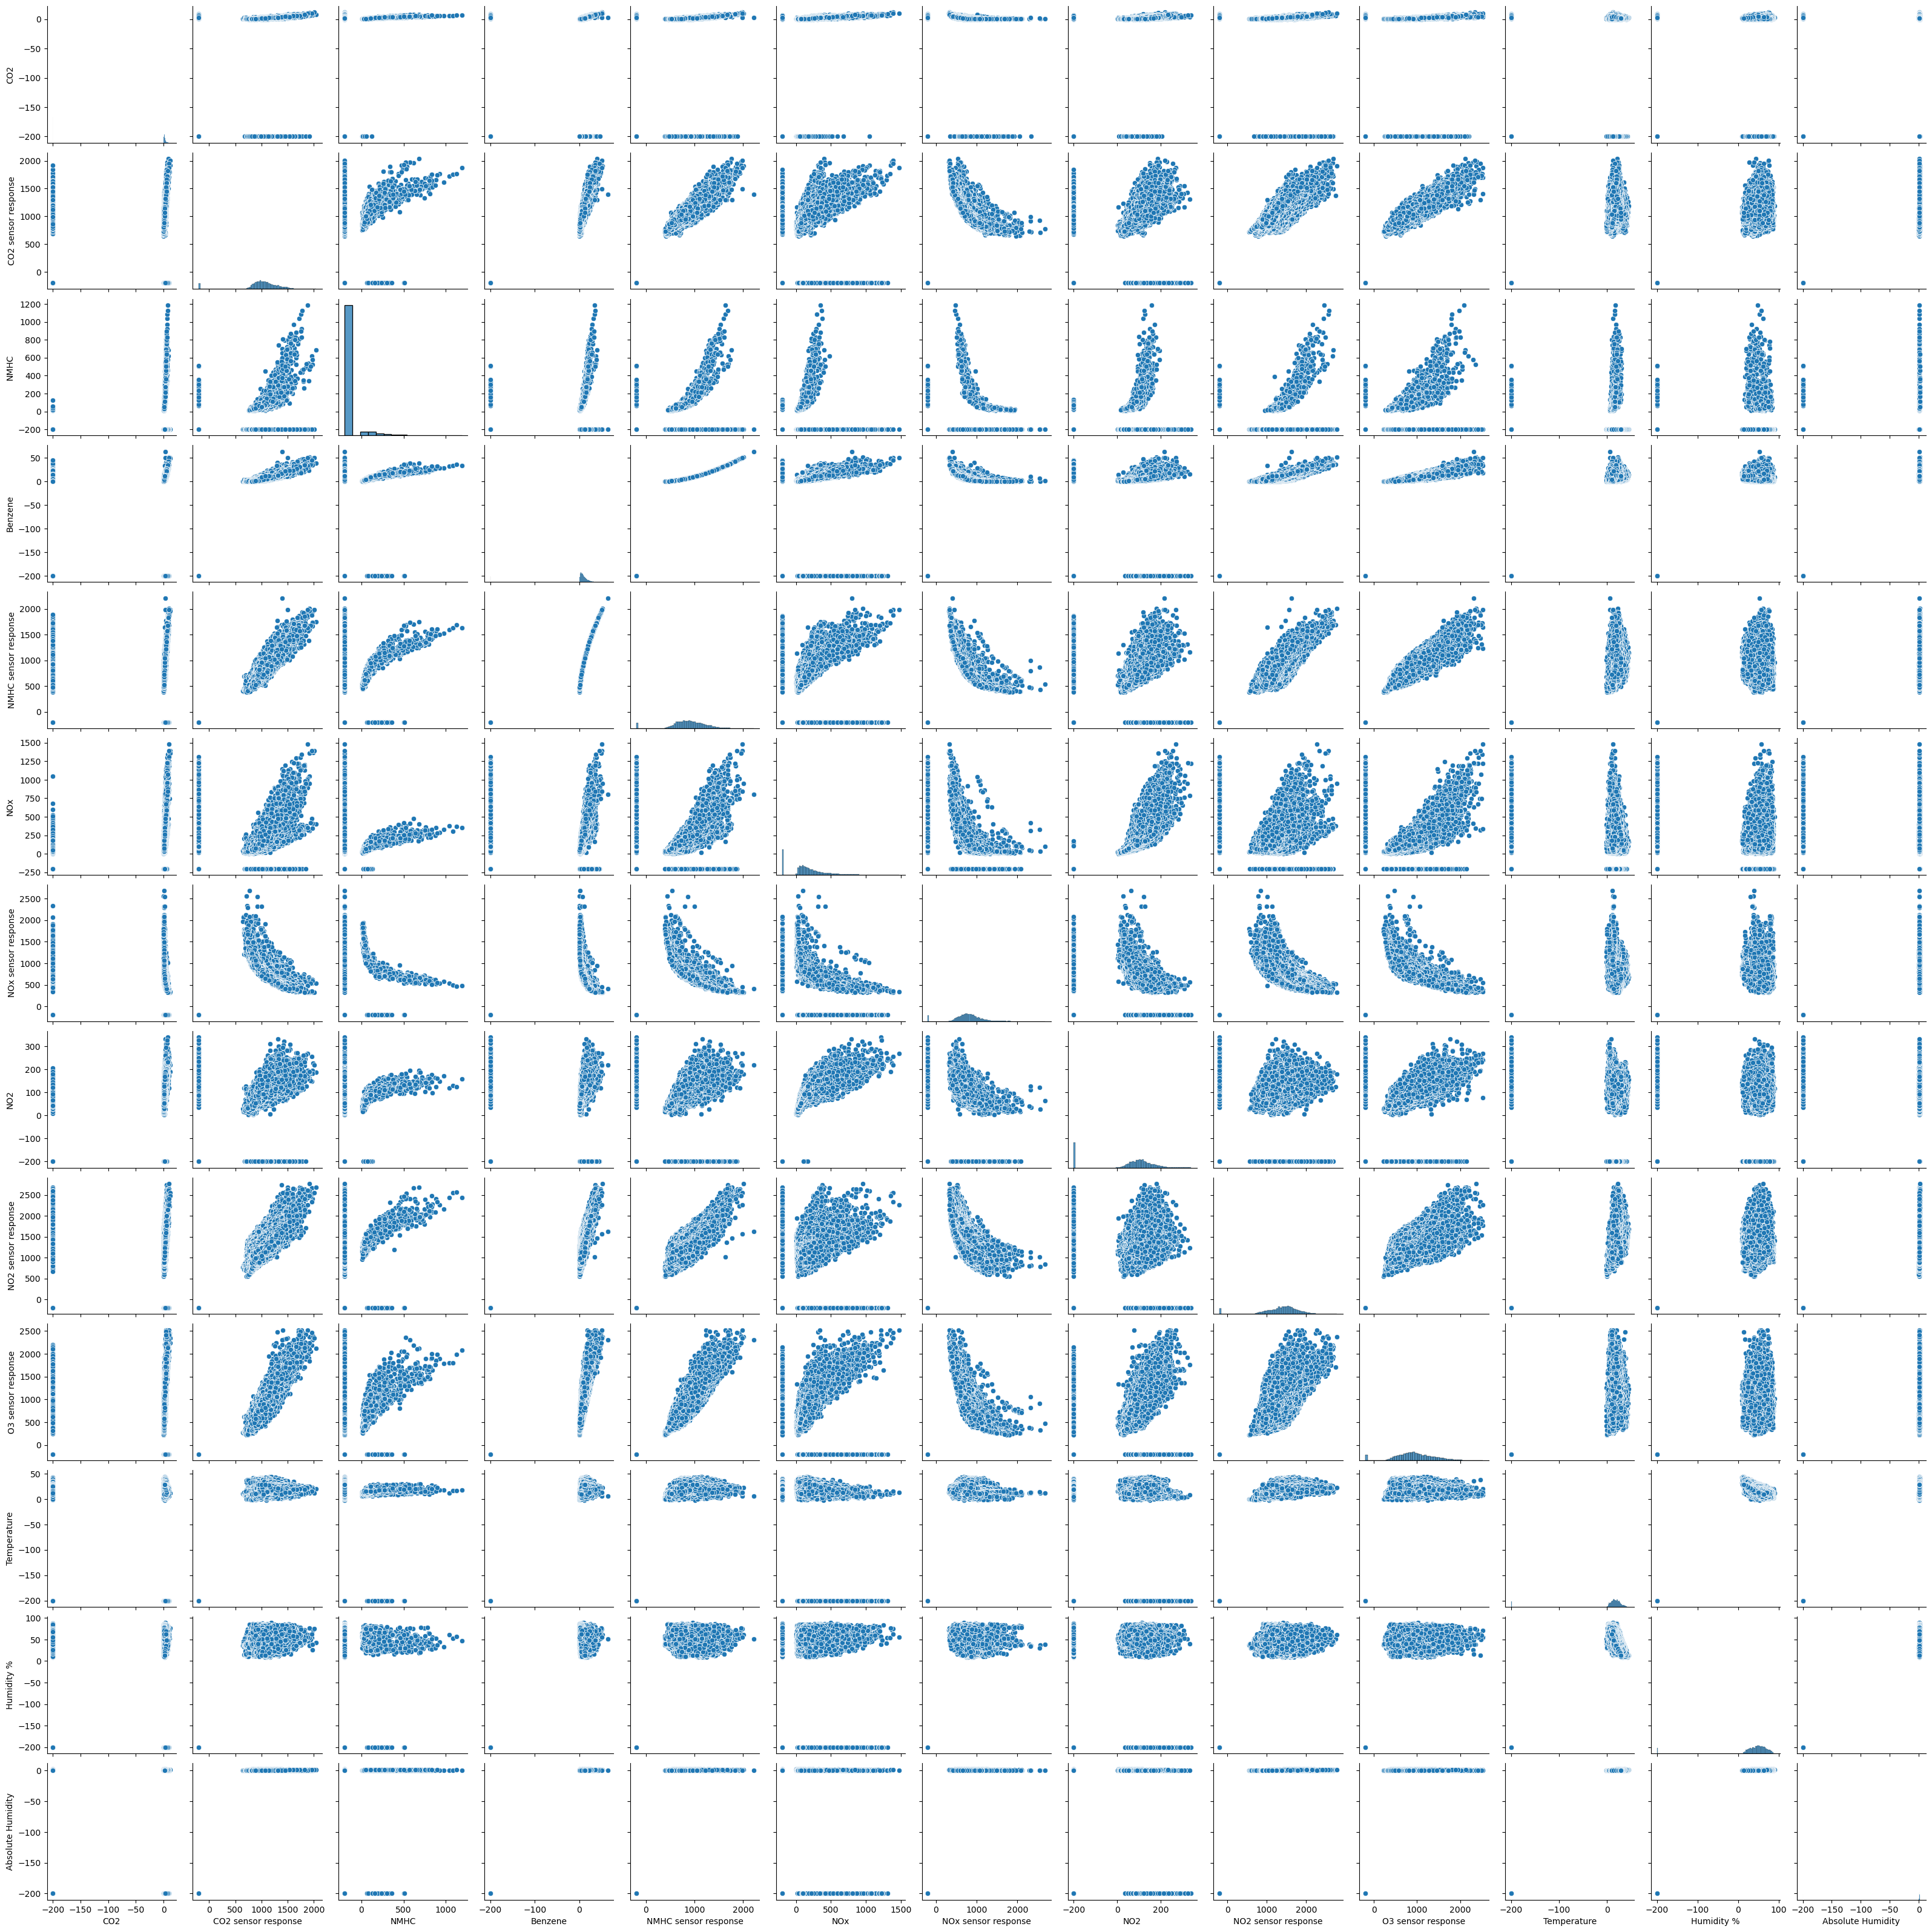

In [7]:
# check potential relationships and outliners
sns.pairplot(df)
plt.show()

In [8]:
# drop humidity % and humidity absolute column since there're no seemingly relevance with others
# drop -200 values in all sensors: probably -200 is NA value due to high repeatance
df2 = df.drop(['Humidity %','Absolute Humidity'],axis = 1)

In [9]:
df2.replace(to_replace=-200,value=np.nan,inplace=True)

In [10]:
df3 = df2.dropna()

In [11]:
df3.describe()

Date         CO2  CO2 sensor response   
count                            827  827.000000           827.000000  \
mean   2004-04-04 02:50:38.452237056    2.353567          1207.741838   
min              2004-03-10 00:00:00    0.300000           752.500000   
25%              2004-03-24 00:00:00    1.300000          1016.875000   
50%              2004-04-02 00:00:00    2.000000          1172.000000   
75%              2004-04-15 00:00:00    3.100000          1380.250000   
max              2004-05-01 00:00:00    8.100000          2039.750000   
std                              NaN    1.409496           241.826753   

              NMHC     Benzene  NMHC sensor response         NOx   
count   827.000000  827.000000            827.000000  827.000000  \
mean    231.025393   10.772367            965.983777  143.501814   
min       7.000000    0.542781            447.500000   12.000000   
25%      77.000000    4.804320            753.500000   81.000000   
50%     157.000000    9.125831            944.250000  128.000000   
75%     318.500000   14.803204           1142.375000  187.000000   
max    1189.000000   39.202340           1754.250000  478.000000   
std     208.461912    7.417127            266.413137   81.829717   

       NOx sensor response         NO2  NO2 sensor response   
count           827.000000  827.000000           827.000000  \
mean            963.178053  100.259976          1600.506550   
min             461.250000   19.000000           955.000000   
25%             768.875000   78.500000          1369.125000   
50%             920.000000   99.000000          1556.250000   
75%            1131.000000  122.000000          1783.375000   
max            1934.500000  196.000000          2679.000000   
std             265.906153   31.493823           302.290036   

       O3 sensor response  Temperature  
count          827.000000   827.000000  
mean          1045.691052    15.599859  
min            263.000000     6.275000  
25%            759.500000    11.875000  
50%           1009.000000    15.025000  
75%           1319.750000    18.350000  
max           2358.500000    30.000000  
std            400.130277     4.825555

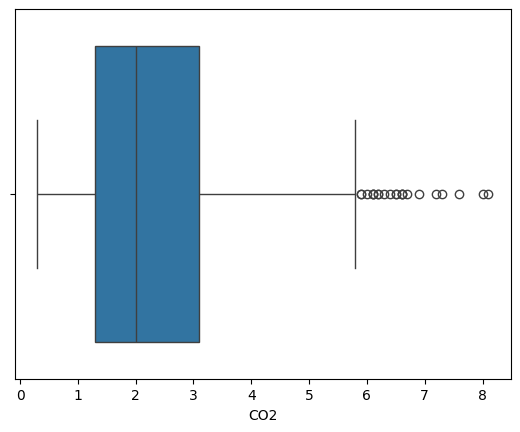

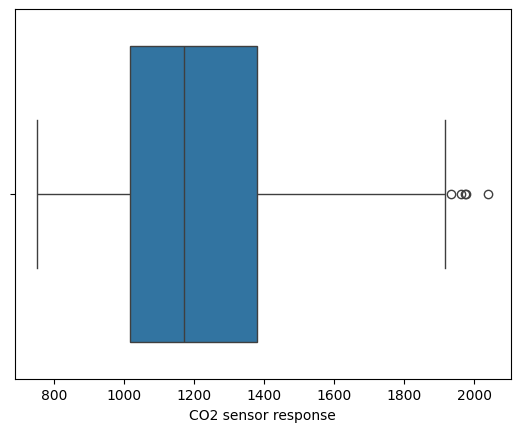

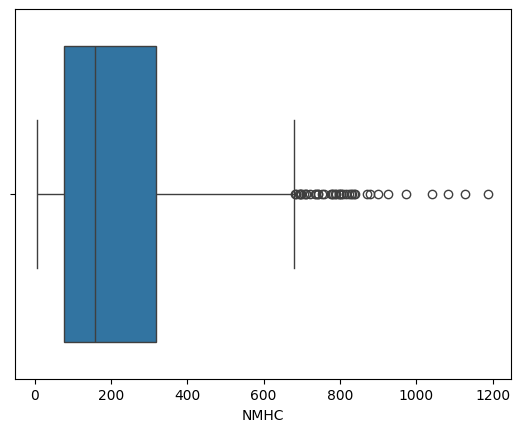

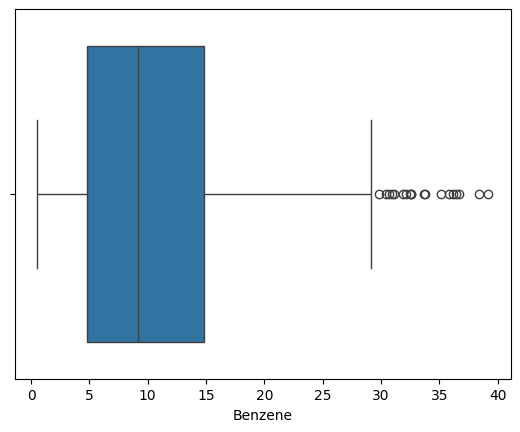

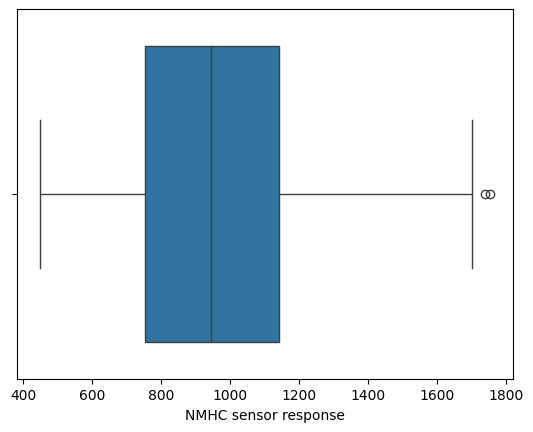

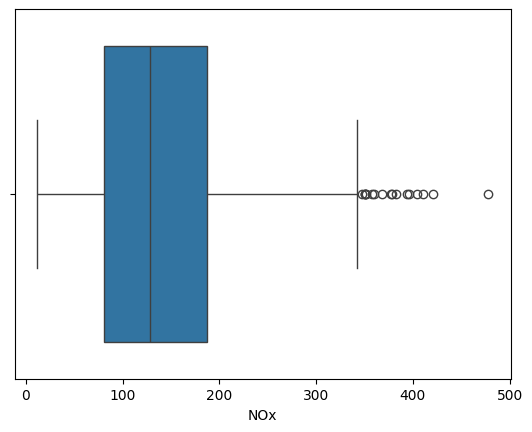

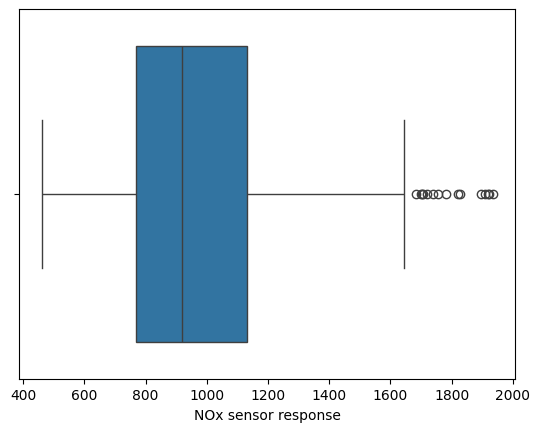

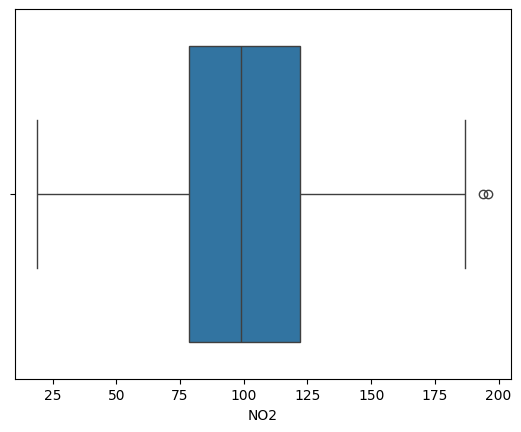

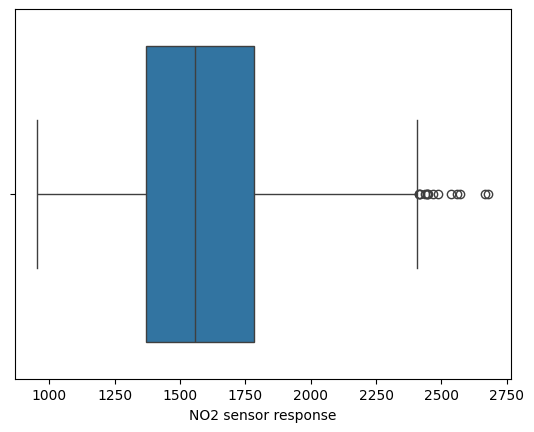

In [12]:
# check outliners again
for i in df3.columns[2:11]:
    sns.boxplot(x=df3[i])
    plt.show()

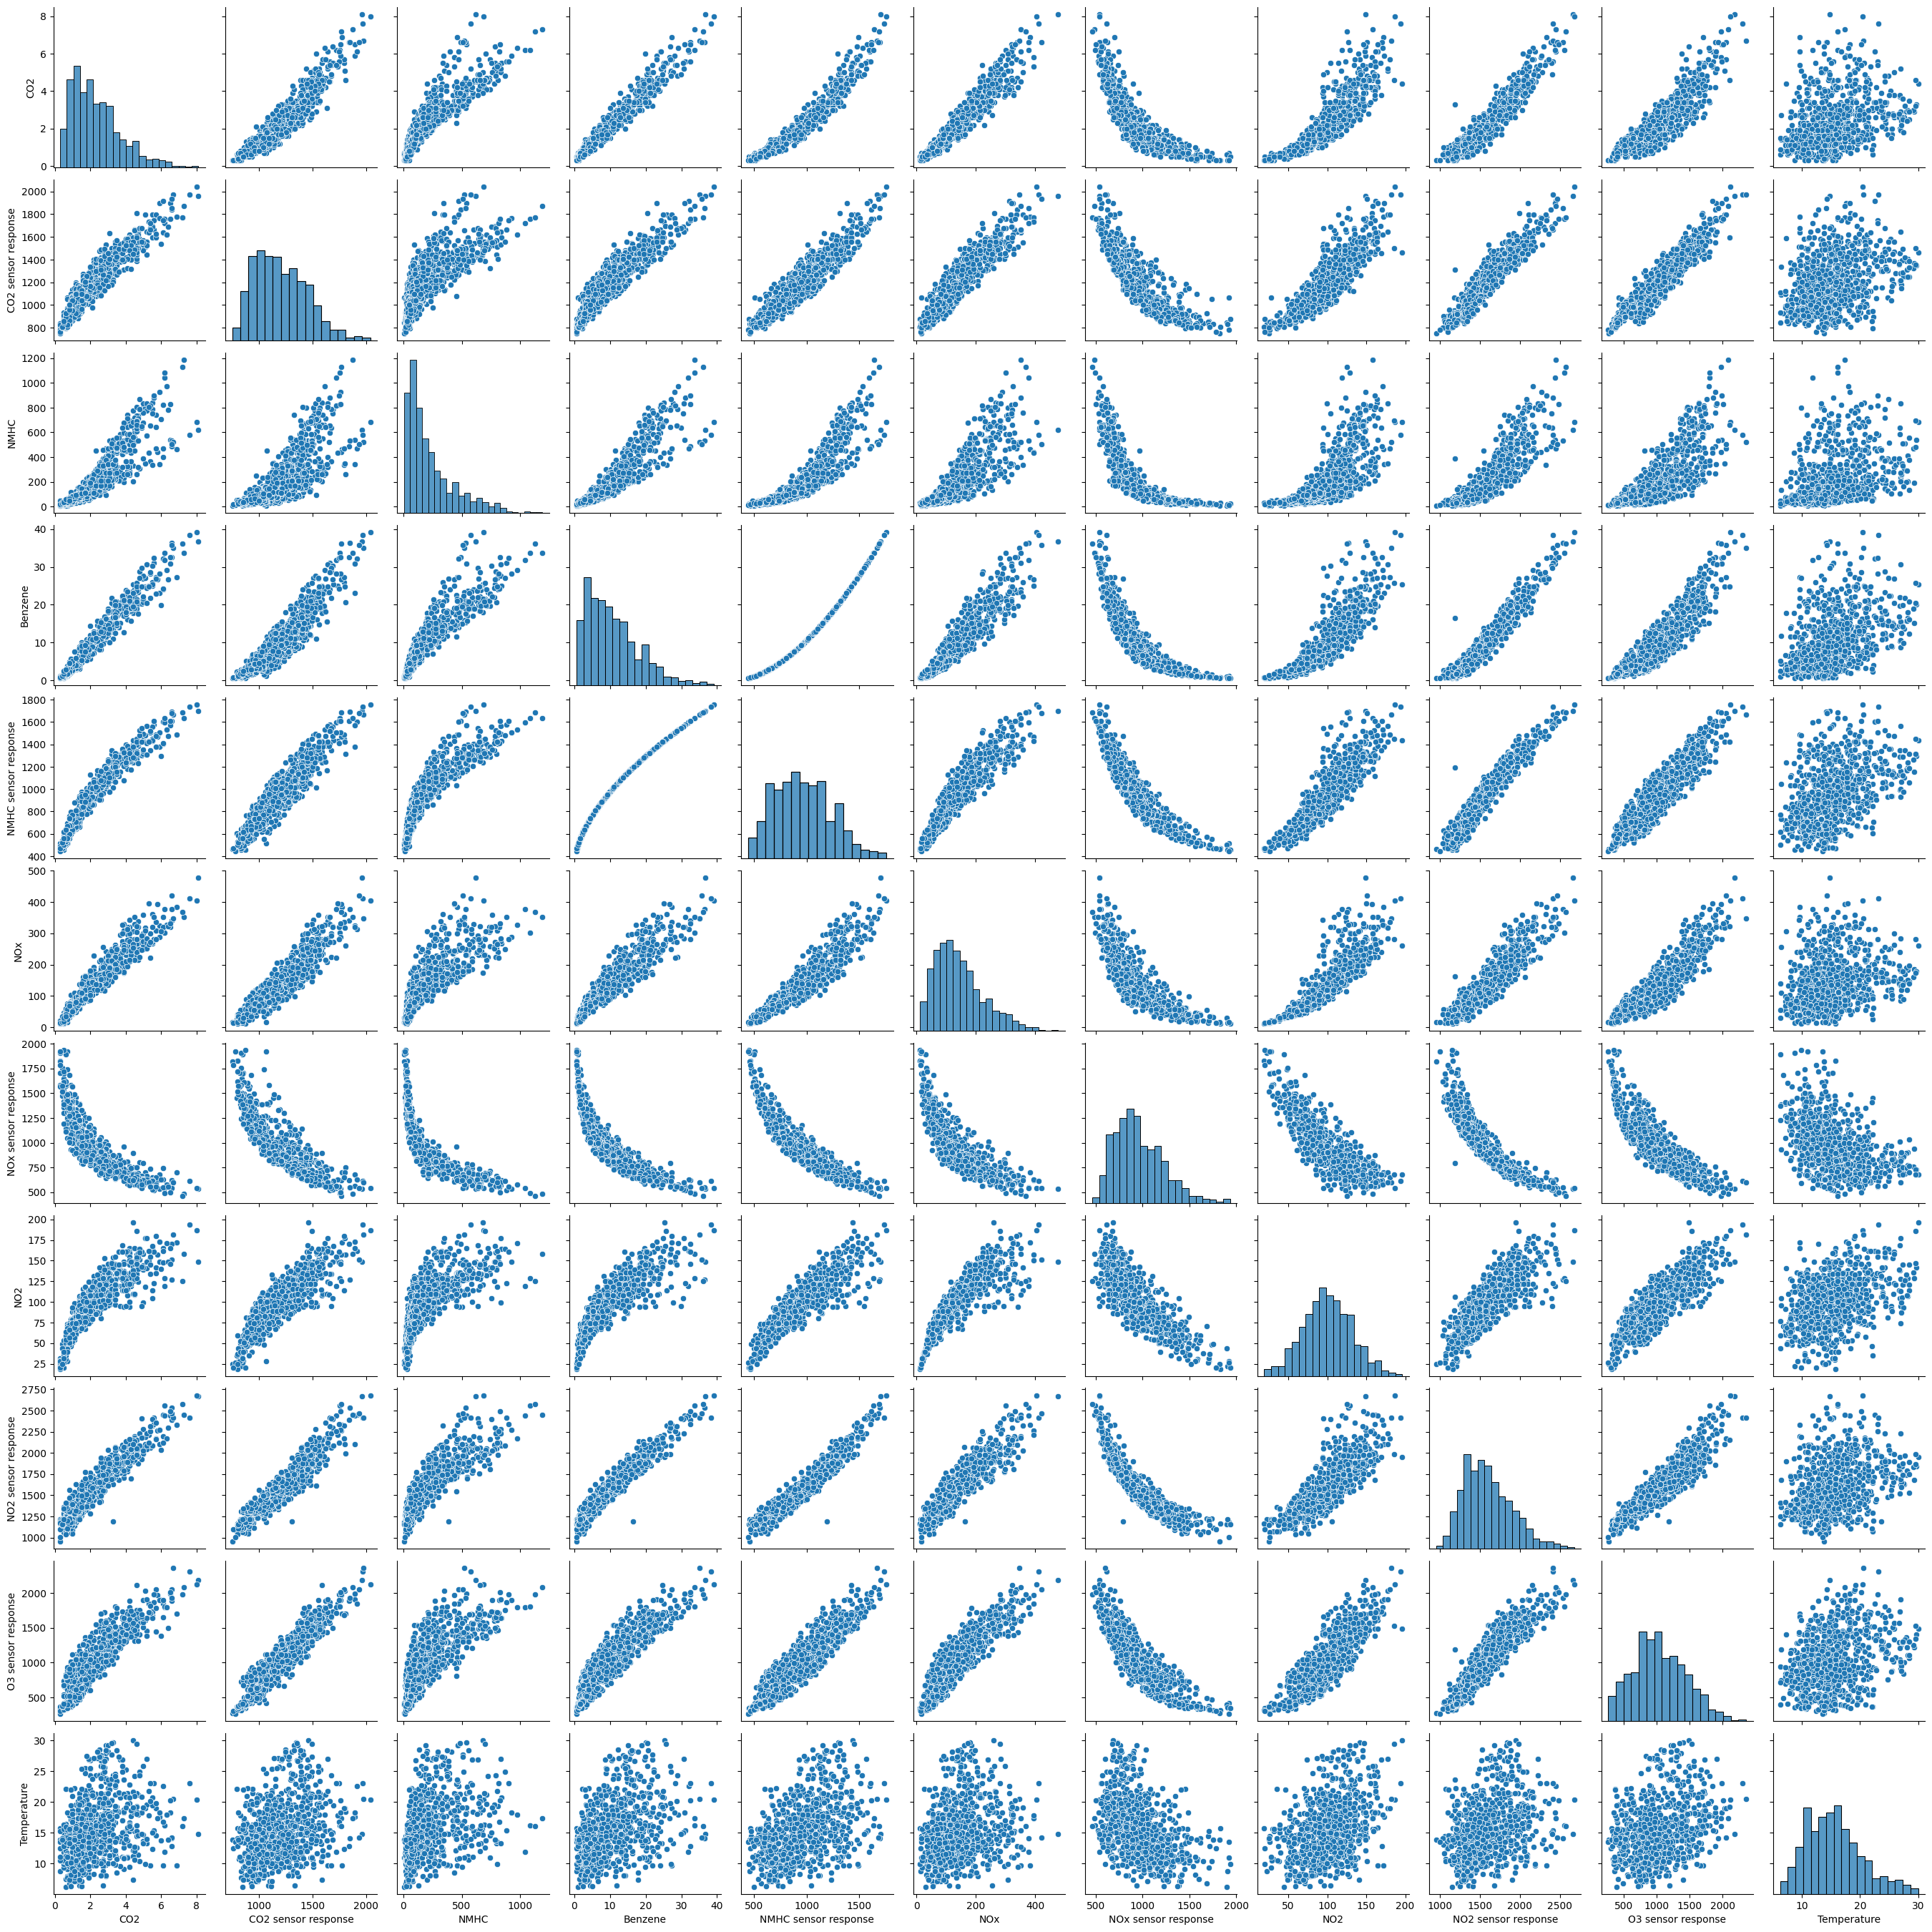

In [13]:
# pairplot new df
sns.pairplot(df3)
plt.show()

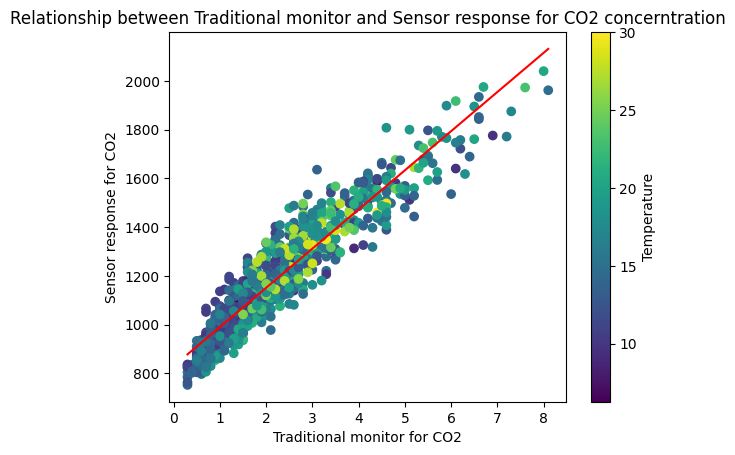

In [14]:
# correlation for CO2
plt.scatter(df3['CO2'],df3['CO2 sensor response'],c=df3['Temperature'])
plt.xlabel('Traditional monitor for CO2')
plt.ylabel('Sensor response for CO2')
plt.title('Relationship between Traditional monitor and Sensor response for CO2 concerntration')
cbar= plt.colorbar()
cbar.set_label('Temperature')
plt.plot(np.unique(df3['CO2']), np.poly1d(np.polyfit(df3['CO2'], df3['CO2 sensor response'], 1))
         (np.unique(df3['CO2'])), color='red')
plt.show()


In [15]:
r_CO2, p_CO2 = pearsonr(df3['CO2'],df3['CO2 sensor response'])
print('Pearsons correlation: %.3f' % r_CO2)
print('P-value: %.4f' % p_CO2)

Pearsons correlation: 0.936
P-value: 0.0000


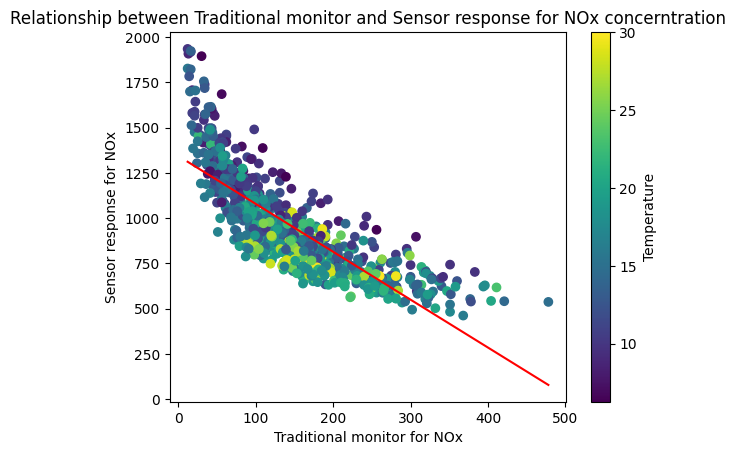

In [16]:
# correlation for NOx
plt.scatter(df3['NOx'],df3['NOx sensor response'],c=df3['Temperature'])
plt.xlabel('Traditional monitor for NOx')
plt.ylabel('Sensor response for NOx')
plt.title('Relationship between Traditional monitor and Sensor response for NOx concerntration')
cbar= plt.colorbar()
cbar.set_label('Temperature')
plt.plot(np.unique(df3['NOx']), np.poly1d(np.polyfit(df3['NOx'], df3['NOx sensor response'], 1))
         (np.unique(df3['NOx'])), color='red')
plt.show()

In [17]:
r_NOx, p_NOx = pearsonr(df3['NOx'],df3['NOx sensor response'])
print('Pearsons correlation: %.3f' % r_NOx)
print('P-value: %.4f' % p_NOx)

Pearsons correlation: -0.814
P-value: 0.0000


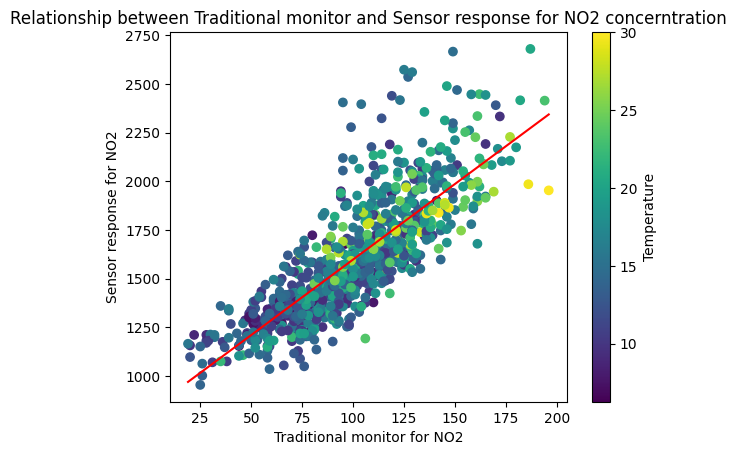

In [18]:
# correlation for NO2
plt.scatter(df3['NO2'],df3['NO2 sensor response'],c=df3['Temperature'])
plt.xlabel('Traditional monitor for NO2')
plt.ylabel('Sensor response for NO2')
plt.title('Relationship between Traditional monitor and Sensor response for NO2 concerntration')
cbar= plt.colorbar()
cbar.set_label('Temperature')
plt.plot(np.unique(df3['NO2']), np.poly1d(np.polyfit(df3['NO2'], df3['NO2 sensor response'], 1))
         (np.unique(df3['NO2'])), color='red')
plt.show()

In [19]:
r_NO2, p_NO2 = pearsonr(df3['NO2'],df3['NO2 sensor response'])
print('Pearsons correlation: %.3f' % r_NO2)
print('P-value: %.4f' % p_NO2)

Pearsons correlation: 0.808
P-value: 0.0000


Testing 3 pairs all give p-value very close to zero, in rejecting Null hypothesis area (which p=0, no correlation)) at alpha 0.05 (2 tailed test)

In [20]:
# create 2 interest group for correlation chart
interests1 = ['CO2 sensor response','NMHC sensor response','NOx sensor response','NO2 sensor response']
interests2 = ['CO2','NMHC','NOx','NO2']

In [21]:
df3[interests1].describe()

CO2 sensor response  NMHC sensor response  NOx sensor response   
count           827.000000            827.000000           827.000000  \
mean           1207.741838            965.983777           963.178053   
std             241.826753            266.413137           265.906153   
min             752.500000            447.500000           461.250000   
25%            1016.875000            753.500000           768.875000   
50%            1172.000000            944.250000           920.000000   
75%            1380.250000           1142.375000          1131.000000   
max            2039.750000           1754.250000          1934.500000   

       NO2 sensor response  
count           827.000000  
mean           1600.506550  
std             302.290036  
min             955.000000  
25%            1369.125000  
50%            1556.250000  
75%            1783.375000  
max            2679.000000

In [22]:
df3[interests1].corr()

CO2 sensor response  NMHC sensor response   
CO2 sensor response              1.000000              0.936364  \
NMHC sensor response             0.936364              1.000000   
NOx sensor response             -0.829552             -0.910622   
NO2 sensor response              0.945006              0.957882   

                      NOx sensor response  NO2 sensor response  
CO2 sensor response             -0.829552             0.945006  
NMHC sensor response            -0.910622             0.957882  
NOx sensor response              1.000000            -0.880199  
NO2 sensor response             -0.880199             1.000000

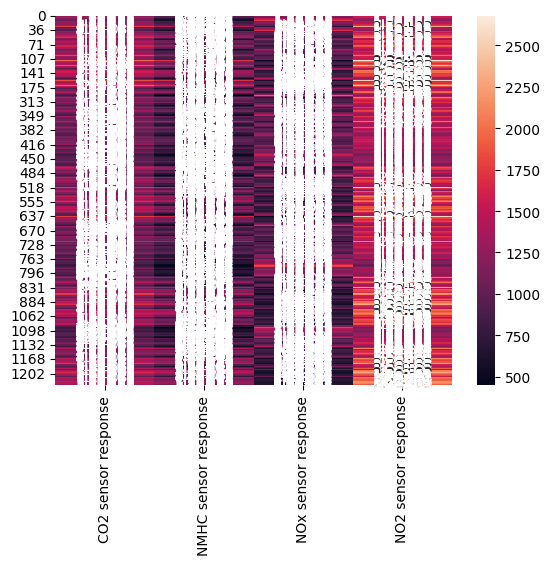

In [23]:
sns.heatmap(df3[interests1], annot=True)
plt.show()

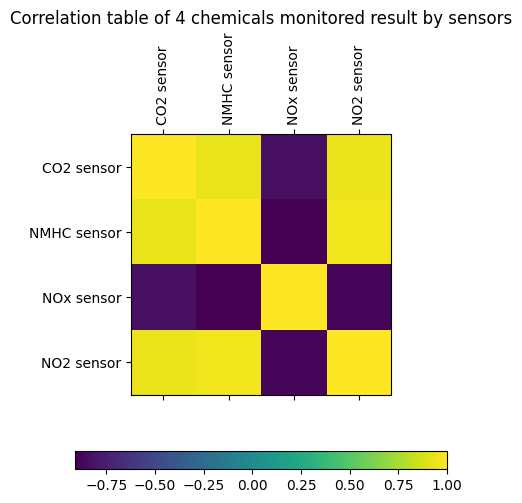

In [24]:
# correclation map in simpler view

plt.matshow(df3[interests1].corr())
plt.xticks(ticks = np.arange(4),labels= ['CO2 sensor','NMHC sensor','NOx sensor','NO2 sensor'], rotation = 'vertical')
plt.yticks(ticks = np.arange(4),labels= ['CO2 sensor','NMHC sensor','NOx sensor','NO2 sensor'])
plt.subplots_adjust(left=0.8,bottom=0.1, right=1, top=0.9)
plt.colorbar(orientation = 'horizontal')
plt.title("Correlation table of 4 chemicals monitored result by sensors")
plt.show()

In [25]:
df3[interests2].describe()

CO2         NMHC         NOx         NO2
count  827.000000   827.000000  827.000000  827.000000
mean     2.353567   231.025393  143.501814  100.259976
std      1.409496   208.461912   81.829717   31.493823
min      0.300000     7.000000   12.000000   19.000000
25%      1.300000    77.000000   81.000000   78.500000
50%      2.000000   157.000000  128.000000   99.000000
75%      3.100000   318.500000  187.000000  122.000000
max      8.100000  1189.000000  478.000000  196.000000

In [26]:
df3[interests2].corr()

CO2      NMHC       NOx       NO2
CO2   1.000000  0.887167  0.951342  0.861432
NMHC  0.887167  1.000000  0.811182  0.728052
NOx   0.951342  0.811182  1.000000  0.857425
NO2   0.861432  0.728052  0.857425  1.000000

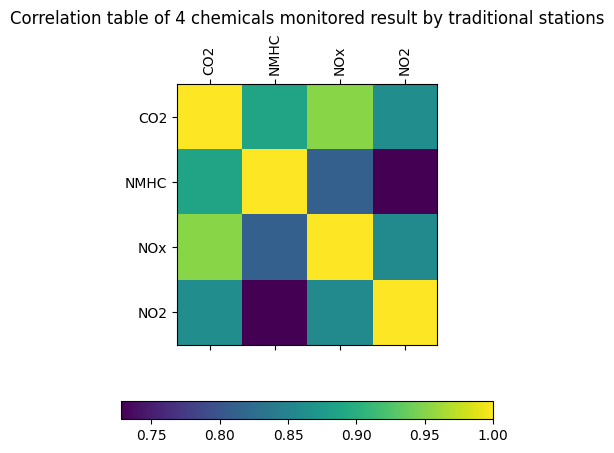

In [27]:
plt.matshow(df3[interests2].corr())
plt.xticks(ticks = np.arange(4),labels= ['CO2','NMHC','NOx','NO2'], rotation = 'vertical')
plt.yticks(ticks = np.arange(4),labels= ['CO2','NMHC','NOx','NO2'])
plt.subplots_adjust(left=0.8,bottom=0.1, right=1, top=0.9)
plt.colorbar(orientation = 'horizontal')
plt.title("Correlation table of 4 chemicals monitored result by traditional stations")
plt.show()

In [28]:
# output used for report writing